In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

In [ ]:
sns.set_style("dark")

In [ ]:
%load_ext autoreload
%autoreload 2
import chess_utility as cu

In [ ]:
games = pd.read_csv('games_new_vars.csv')

## Recalling the objective

Recall we are trying to predict probabilities of winning. In particular, we are trying to find out the probability of a higher rated player winning a match. We predict these probabilities using the absolute value difference in rating between two players, the number of turns, and whether the higher rated player is white. At the outset, we will limit our models to binary classification (win or loss of higher rated player). Then, we will classify for result (win, loss, or draw). 

We will fit a logistic regression (only in the binary classification case), a bag of trees, a random forest, and perform linear discriminant analysis (when we classify wins, losses and draws). For each model, we will perform a stratified k-fold cross validation with ten fold splits to determine performance. Prediction accuracy as well as a confusion matrix for each model will help us determine which model performs best. 

## Model fitting for the binary case

#### Normalization and response variable

Before fitting models, we will normalize our data. This is important since we intend on using multiple predictors, and our predictors could be on different scales. 

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
X = normalize(games[['abs_diff_rating', 'turns', 'white_higher_rated']])

In [ ]:
y = games['higher_rating_won']

In [ ]:
RANDOM_STATE = 1
NUMBER_FOLDS = 10

Some of the algorithms below automatically randomize. By setting a RANDOM STATE, we will pick a random result and stick with it through out the analysis. Also, when we cross validate using K fold cross validation we will specify 10 folds through NUMBER FOLDS. 

#### Logistic regression

We will begin with a Logistic Regression and perform a stratifed 10 fold cross validation on the model. 

In [ ]:
lg_confusion_matrix = cu.run_logistic_regression(NUMBER_FOLDS, X, y, RANDOM_STATE)
lg_results = cu.get_cm_results(lg_confusion_matrix)

#### Tree based methods

Next, we will fit a bag of trees to our data. In the case of fitting a bag of trees and a random forest, we will use 100 estimators. This means that we will be using 100 trees in each case to build the models. 

In [ ]:
NUMBER_ESTIMATORS = 100

In [ ]:
bag_confusion_matrix = cu.run_bag_trees(NUMBER_FOLDS, NUMBER_ESTIMATORS, RANDOM_STATE, X, y)
bag_results = cu.get_cm_results(bag_confusion_matrix)

In [180]:
r_forest_confusion_matrix = cu.run_random_forest(NUMBER_FOLDS, NUMBER_ESTIMATORS, RANDOM_STATE, X, y)
r_forest_results = cu.get_cm_results(rforest_confusion_matrix)

#### Results readings

We first acquire important measures in classification so we can plot them. 

In [215]:
accuracy, precision, recall, fmeasure, specificity, negative_pv = cu.group_important_results(lg_results, bag_results, r_forest_results)

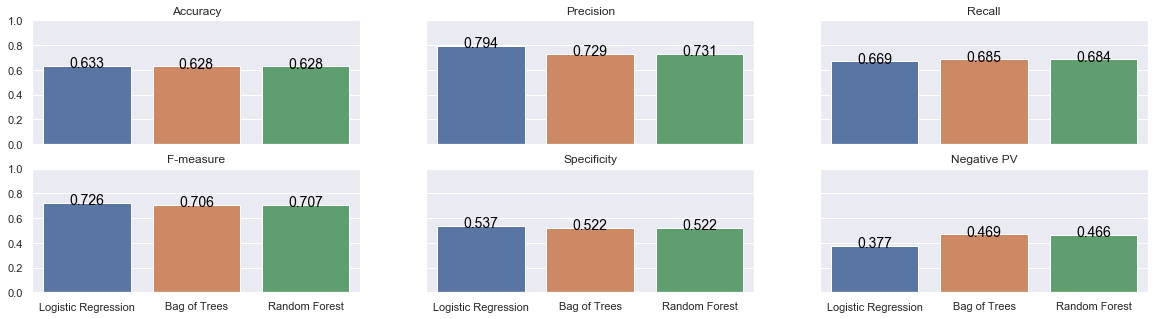

In [235]:
cu.create_specific_results_plot(r_forest_results, lg_results, bag_results)

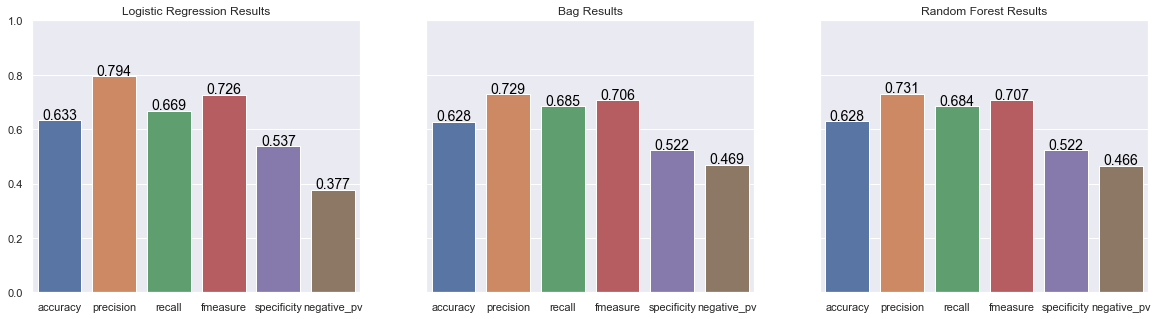

In [236]:
cu.create_cumulative_results_plot(r_forest_results, lg_results, bag_results)

## Beyond binary 
In this section, we refit all models except for our logistic regression. This time, our response will be 'result'. Recall this encoded whether games were a loss, draw, or win for the higher rated player. 

In [ ]:
y = games['result']

## Bag of Trees

We continue hunting for good models with a bag of trees. Here, we also run stratified 10 fold cross validation.  

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
bag = BaggingClassifier(base_estimator = tree, 
                        n_estimators = NUMBER_ESTIMATORS, 
                       random_state = RANDOM_STATE)

In [ ]:
bag_confusion_matrix = cu.run_stratified_k(bag, NUMBER_FOLDS, X, y, RANDOM_STATE)

In [ ]:
bag_confusion_matrix

## Random Forest
Next, we fit a random forest model. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators = NUMBER_ESTIMATORS, random_state = RANDOM_STATE)

In [ ]:
rforest_confusion_matrix = cu.run_stratified_k(random_forest, NUMBER_FOLDS, X, y, RANDOM_STATE)

In [ ]:
rforest_confusion_matrix

## Linear Discriminant Analysis